In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [42]:
kitten = cv2.imread("D:\Programming-1\K-Means\kitten.jpg")
print(kitten.shape)

(1000, 1000, 3)


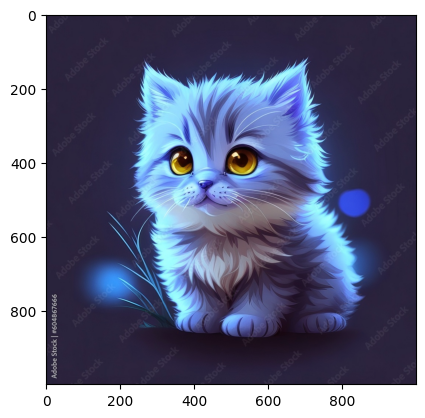

In [43]:
plt.imshow(kitten)

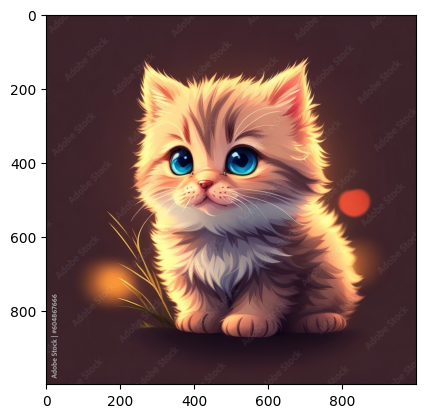

In [44]:
kitten = cv2.cvtColor(kitten, cv2.COLOR_BGR2RGB)
plt.title = "Pookie"
plt.imshow(kitten)

Flatten image dimentions into single channel arrays

In [19]:
reshaped_kitten_img = kitten.reshape((-1, 3))
print(reshaped_kitten_img.shape)

(1000000, 3)


The image has multiple colors formed using the RGB conbinations and we will try to create four clusters and extract four main dominant colors from the image and assign clusters to the color points.

In [21]:
from sklearn.cluster import KMeans

In [22]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(reshaped_kitten_img)

KMeans(n_clusters=4)

In [23]:
km.cluster_centers_

array([[ 64.08144142,  36.7904272 ,  43.3447161 ],
       [247.75470194, 212.55204765, 147.62347685],
       [208.08654965, 132.04800358, 105.44726766],
       [127.13916057,  84.83500193,  83.61185984]])

In [25]:
centers = np.array(km.cluster_centers_, dtype="uint8")

In [26]:
centers

array([[ 64,  36,  43],
       [247, 212, 147],
       [208, 132, 105],
       [127,  84,  83]], dtype=uint8)

Now we have the values of the four colors , represented by their RGB Values

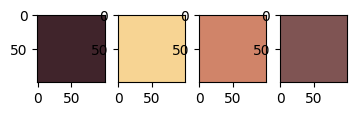

In [45]:
plt.figure(figsize=(4,2))
i = 1
colors = []
for color in centers:
    
    plt.subplot(1,4,i)
    i+=1
    colors.append(color)
    a = np.zeros((100,100,3), dtype="uint8")
    a[:,:,:] = color
    plt.imshow(a)

plt.show()

In [31]:
plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

Segmentation of the image/

In [47]:
new_img = np.zeros((1000*1000,3), dtype="uint8")

In [48]:
new_img.shape

(1000000, 3)

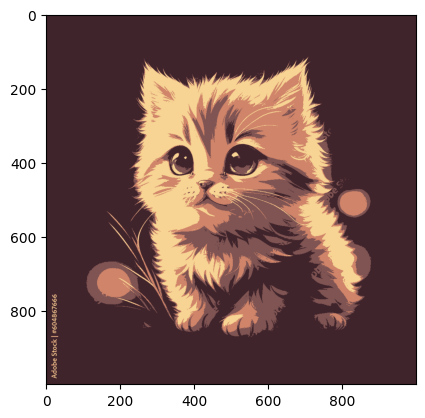

In [50]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]

new_img = new_img.reshape((1000, 1000, 3))
plt.imshow(new_img)


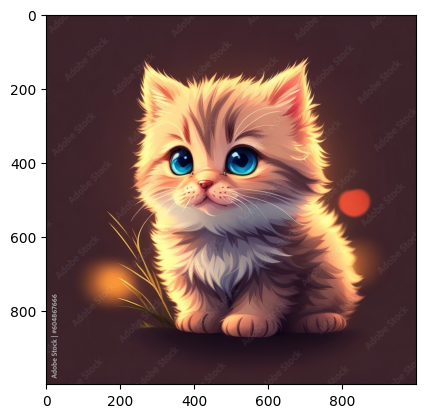

In [55]:
cluster_to_remove = 2
new_img = np.copy(kitten)
for i in range(new_img.shape[0]):
    if km.labels_[i] == cluster_to_remove:
        # Set pixels belonging to the cluster to white
        new_img[i] = [255, 255, 255]  # white color

plt.imshow(new_img)
plt.show()